In [1]:
import duckdb
import pandas as pd
import plotly.express as px
from plotly_calplot import calplot

from common.env_variables import DUCKDB_DWH_FILE


def execute(sql_statement):
    conn = duckdb.connect(DUCKDB_DWH_FILE, read_only=True)
    _df = conn.execute(sql_statement).df()
    conn.close()
    return _df


def display_df(_df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, "expand_frame_repr", False,
                           "display.float_format", '${:,.2f}'.format):
        display(_df.fillna('.'))


In [2]:
execute(f'''
SELECT company_name, j.job_ldts, j.job_id, title, list(technology_name) as technologies
  FROM dim_job j
  JOIN dim_job_technology t ON j.job_id = t.job_id
 WHERE title ILIKE 'senior%data engineer%' AND
       company_name ILIKE '%lidl digital%'
 GROUP BY company_name, j.job_ldts, j.job_id, title
 ORDER BY j.job_id
 LIMIT 100
''')

,company_name,job_ldts,job_id,title,technologies
0,Lidl Digital,2021-10-04 23:00:00,7577937,Senior Marketing Data Engineer (m/w/d),"[Azure, Databricks, ELT, ETL, GCP, Pandas, Pyt..."
1,Lidl Digital,2021-10-29 18:00:00,7657393,Senior Marketing Data Engineer (m/w/d),"[Azure, Databricks, ELT, ETL, GCP, Pandas, Pyt..."
2,Lidl Digital,2021-11-28 11:00:00,7740708,Senior Marketing Data Engineer (m/w/d),"[Azure, Databricks, ELT, ETL, GCP, Pandas, Pyt..."
3,Lidl Digital,2021-12-28 10:00:00,7829335,Senior Marketing Data Engineer (m/w/d),"[Azure, Databricks, ELT, ETL, GCP, Pandas, Pyt..."
4,Lidl Digital,2022-01-27 08:00:00,7918391,Senior Marketing Data Engineer (m/w/d),"[Azure, Databricks, ELT, ETL, GCP, Pandas, Pyt..."
5,Lidl Digital,2022-02-10 11:00:00,7968112,Senior Marketing Data Engineer (m/w/d),"[SQL, Azure, Databricks, ELT, ETL, GCP, Pandas..."
6,Lidl Digital,2022-03-12 09:00:00,8080064,Senior Marketing Data Engineer (m/w/d),"[Azure, Databricks, ELT, ETL, GCP, Pandas, Pyt..."
7,Lidl Digital,2022-04-11 08:00:00,8178654,Senior Marketing Data Engineer (m/w/d),"[Azure, Databricks, ELT, ETL, GCP, Pandas, Pyt..."
8,Lidl Digital,2022-05-11 14:00:00,8280851,Senior Marketing Data Engineer (m/w/d),"[Azure, Databricks, ELT, ETL, GCP, Pandas, Pyt..."
9,Lidl Digital,2022-06-10 08:00:00,8381739,Senior Marketing Data Engineer (m/w/d),"[Azure, Databricks, ELT, ETL, GCP, Pandas, Pyt..."


In [3]:
df = execute(f'''
SELECT date_key,
       list(f.job_id) as job_id_list,
       count(f.job_id) as job_id_count
  FROM fact_online_job f
  JOIN dim_job d ON f.job_id = d.job_id
  JOIN dim_job_technology t ON f.job_id = t.job_id
 WHERE d.title ILIKE '%senior%data engineer%' AND
       d.company_name ILIKE '%lidl digital%' AND
       t.technology_name ILIKE '%pandas%'
 GROUP BY date_key
 LIMIT 1000
''')
df

,date_key,job_id_list,job_id_count
0,2021-10-09,[7577937],1
1,2021-10-10,[7577937],1
2,2021-10-11,[7577937],1
3,2021-10-12,[7577937],1
4,2021-10-13,[7577937],1
...,...,...,...
389,2023-01-03,[9064144],1
390,2023-01-04,[9064144],1
391,2023-01-05,[9064144],1
392,2023-01-06,[9064144],1


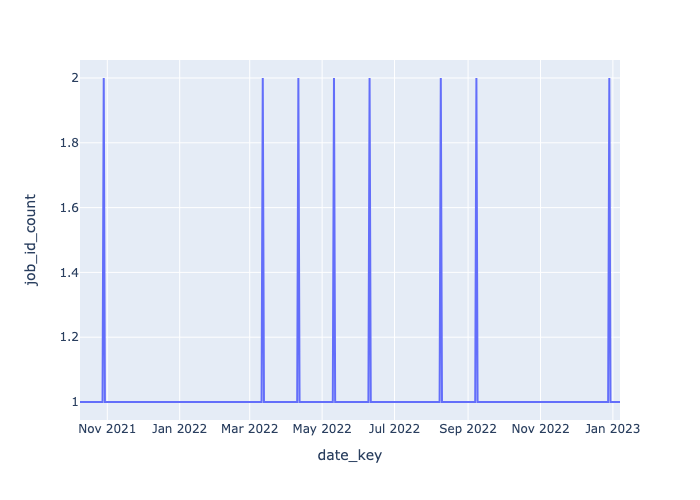

In [4]:
fig = px.line(df, x='date_key', y="job_id_count", hover_name="job_id_list")
fig.show('png')
